In [1]:
# Basic python import
import os
import sys
import yaml
import matplotlib.pyplot as plt
import pandas as pd

# Pytorch
import torch
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn

# Our custom module
sys.path.append('../')
import data_processing
import models
import evaluation as eval
import submission as sub

# Config

Ma proposition : 
Avoir un Notebook template associé à des paramètres par défaut. 
Ensuite pour chaque expérience on le duplique, et on change les valeurs des paramètres que l'on souhaite.

In [2]:
with open('../configs/default_params.yaml') as default_params_file:
      default_params = yaml.safe_load(default_params_file)
params = default_params
params

data_dir = os.path.join('..','data')

torch.manual_seed(0)
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')

In [3]:
# Changer de paramètres
params["train"]["batch_size"] = 2
params["train"]

{'script_path': '../train/A_COMPLETER.py',
 'batch_size': 2,
 'epochs': 1000,
 'data_augmentation': {'samplewise_center': False,
  'samplewise_std_normalization': False,
  'rotation_range': 0,
  'width_shift_range': 0.1,
  'height_shift_range': 0.1,
  'horizontal_flip': True,
  'vertical_flip': False,
  'zoom_range': 0,
  'shear_range': 0,
  'channel_shift_range': 0,
  'featurewise_center': False,
  'zca_whitening': False}}

# If necessary, pre-process raw data

In [4]:
from data_processing.preproc import create_masks_as_tiff, preprocess_images_and_masks

#create_masks_as_tiff(data_dir)


# Create Dataset and Dataloader

In [5]:
from data_processing.dataset import CustomDataset
import torchvision.transforms as transforms

transform = transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((512,512))
])

train_dataset = CustomDataset(root_dir = os.path.join('..','data'), transform=transform)

train_dl = DataLoader(train_dataset, batch_size=params["train"]["batch_size"], shuffle=True)

In [6]:
print(train_dataset[0][0].shape)

torch.Size([3, 512, 512])


# Train

In [7]:
from models.unet import UNet

MODEL = UNet(num_classes=1)
lr = 1e-3
optimizer = optim.Adam(MODEL.parameters(), lr=lr)
loss = nn.MSELoss()
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [8]:
from train.train import main_train

loss_list = main_train(model=MODEL.to(device), loss_fn=loss, optimizer=optimizer, n_epochs=50, dataloader=train_dl, device=device)

100%|██████████| 176/176 [04:03<00:00,  1.38s/it]


epoch 1/50, train_loss = 8.29e-02, time spent during this epoch = 243.67s, total time spent = 243.67s


100%|██████████| 176/176 [03:36<00:00,  1.23s/it]


epoch 2/50, train_loss = 7.63e-02, time spent during this epoch = 216.55s, total time spent = 460.22s


100%|██████████| 176/176 [03:49<00:00,  1.30s/it]


epoch 3/50, train_loss = 7.18e-02, time spent during this epoch = 229.53s, total time spent = 689.75s


100%|██████████| 176/176 [04:11<00:00,  1.43s/it]


epoch 4/50, train_loss = 6.69e-02, time spent during this epoch = 251.72s, total time spent = 941.47s


100%|██████████| 176/176 [04:15<00:00,  1.45s/it]


epoch 5/50, train_loss = 6.50e-02, time spent during this epoch = 255.03s, total time spent = 1196.51s


100%|██████████| 176/176 [03:57<00:00,  1.35s/it]


epoch 6/50, train_loss = 6.42e-02, time spent during this epoch = 237.46s, total time spent = 1433.96s


100%|██████████| 176/176 [04:26<00:00,  1.51s/it]


epoch 7/50, train_loss = 6.22e-02, time spent during this epoch = 266.47s, total time spent = 1700.43s


100%|██████████| 176/176 [04:10<00:00,  1.42s/it]


epoch 8/50, train_loss = 5.84e-02, time spent during this epoch = 250.18s, total time spent = 1950.60s


100%|██████████| 176/176 [04:02<00:00,  1.38s/it]


epoch 9/50, train_loss = 5.60e-02, time spent during this epoch = 242.82s, total time spent = 2193.43s


100%|██████████| 176/176 [04:21<00:00,  1.49s/it]


epoch 10/50, train_loss = 5.51e-02, time spent during this epoch = 261.92s, total time spent = 2455.34s


100%|██████████| 176/176 [03:49<00:00,  1.31s/it]


epoch 11/50, train_loss = 5.54e-02, time spent during this epoch = 229.74s, total time spent = 2685.09s


100%|██████████| 176/176 [04:31<00:00,  1.54s/it]


epoch 12/50, train_loss = 5.44e-02, time spent during this epoch = 271.45s, total time spent = 2956.53s


100%|██████████| 176/176 [04:49<00:00,  1.65s/it]


epoch 13/50, train_loss = 5.36e-02, time spent during this epoch = 289.99s, total time spent = 3246.53s


100%|██████████| 176/176 [04:15<00:00,  1.45s/it]


epoch 14/50, train_loss = 5.10e-02, time spent during this epoch = 255.77s, total time spent = 3502.30s


100%|██████████| 176/176 [04:34<00:00,  1.56s/it]


epoch 15/50, train_loss = 5.01e-02, time spent during this epoch = 274.36s, total time spent = 3776.66s


100%|██████████| 176/176 [05:07<00:00,  1.75s/it]


epoch 16/50, train_loss = 4.73e-02, time spent during this epoch = 307.60s, total time spent = 4084.26s


100%|██████████| 176/176 [04:34<00:00,  1.56s/it]


epoch 17/50, train_loss = 4.62e-02, time spent during this epoch = 274.62s, total time spent = 4358.88s


100%|██████████| 176/176 [04:45<00:00,  1.62s/it]


epoch 18/50, train_loss = 4.56e-02, time spent during this epoch = 285.86s, total time spent = 4644.74s


100%|██████████| 176/176 [04:02<00:00,  1.38s/it]


epoch 19/50, train_loss = 4.15e-02, time spent during this epoch = 242.45s, total time spent = 4887.19s


100%|██████████| 176/176 [25:51<00:00,  8.82s/it]  


epoch 20/50, train_loss = 4.28e-02, time spent during this epoch = 1551.62s, total time spent = 6438.81s


100%|██████████| 176/176 [03:37<00:00,  1.23s/it]


epoch 21/50, train_loss = 3.95e-02, time spent during this epoch = 217.16s, total time spent = 6655.97s


100%|██████████| 176/176 [03:43<00:00,  1.27s/it]


epoch 22/50, train_loss = 4.29e-02, time spent during this epoch = 223.95s, total time spent = 6879.92s


100%|██████████| 176/176 [03:30<00:00,  1.20s/it]


epoch 23/50, train_loss = 4.11e-02, time spent during this epoch = 210.34s, total time spent = 7090.26s


100%|██████████| 176/176 [04:08<00:00,  1.41s/it]


epoch 24/50, train_loss = 3.74e-02, time spent during this epoch = 248.46s, total time spent = 7338.72s


100%|██████████| 176/176 [03:32<00:00,  1.21s/it]


epoch 25/50, train_loss = 3.85e-02, time spent during this epoch = 212.09s, total time spent = 7550.81s


100%|██████████| 176/176 [03:20<00:00,  1.14s/it]


epoch 26/50, train_loss = 3.74e-02, time spent during this epoch = 200.18s, total time spent = 7750.99s


 47%|████▋     | 82/176 [01:21<02:05,  1.33s/it]

Text(0.5, 0, 'Epoch')

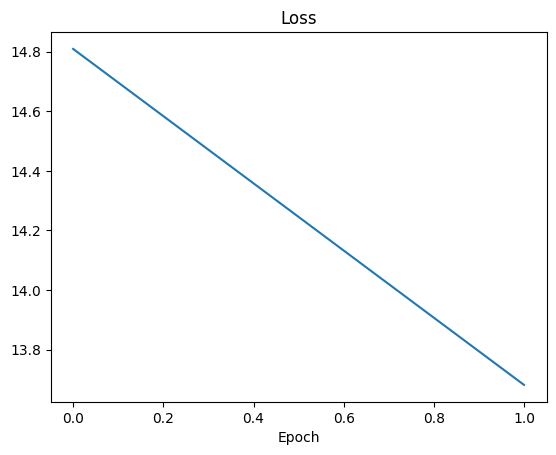

In [9]:
plt.plot(loss_list)
plt.title("Loss")
plt.xlabel("Epoch")

# Evaluation

Running model on validation dataset

In [10]:
val_pred = {"val_images":[], "val_masks":[], "val_organs":[], "val_y_preds":[]}
for k, X in enumerate(train_dl):
    for val_image, val_organ, val_mask in X :
        val_pred['val_images'].append(val_image)
        val_pred['val_mask'].append(val_mask)
        val_pred['val_organ'].append(val_organ)
        pred = MODEL(val_image)
        val_pred['val_y_preds'].append(pred)

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
IoUs, IoUsOrgans = eval.get_y_true_y_pred(val_pred)

# Plot results for different threshold on all training and get best threshold
best_threshold = eval.plot_iou_by_threshold(IoUs, 'test')

We can also look at some of the results

In [ ]:
eval.plot_validation_predictions(val_pred, best_threshold, 10)

# Submission

In [ ]:
import submission as sub

test_dataset = None
sub.make_submission(MODEL, test_dataset, best_threshold)